# Business Understanding

## Project Domain

Analisis dan Prediksi Data Iklim
Proyek ini berada dalam domain analisis Data Science dan Machine Learning , khususnya data iklim dan cuaca berdasarkan data historis. Data digunakan untuk mengetahui tren suhu, kelembaban, dan parameter lainnya, serta membangun model prediktif untuk meramalkan kondisi cuaca di masa depan.:)

## Problem Statements

Data historis iklim kota Jena antara tahun 2009 hingga 2016 menunjukkan berbagai suhu dan kelembaban yang kompleks. Namun, tanpa alat bantu analisis atau sistem prediksi, sulit bagi masyarakat atau lembaga untuk memahami pola iklim tersebut dan mengantisipasi perubahan ekstrem yang mungkin terjadi. Kurangnya sistem prediksi berbasis data membuat pengambilan keputusan menjadi kurang akurat, terutama dalam konteks pertanian, energi, atau perencanaan kota.

## Goals

Menganalisis dataset iklim dari Jena untuk mengidentifikasi pola dan tren cuaca dari tahun 2009 hingga 2016.

Menyebutkan model pembelajaran mesin untuk memprediksi suhu udara berdasarkan parameter cuaca lainnya seperti kelembaban, tekanan udara, kecepatan angin, dan sinar matahari.

Menyajikan visualisasi data dan hasil prediksi dalam bentuk dashboard sederhana atau grafik interaktif agar mudah dipahami pengguna non-teknis.

## Solution Statements

Proyek ini akan mengembangkan solusi berupa aplikasi atau sistem analisis dan prediksi iklim berbasis data historis menggunakan pembelajaran mesin algoritma (seperti regresi atau LSTM). Sistem ini akan membaca data iklim dari file CSV, membersihkannya, mengekstrak fitur penting, lalu melatih model prediktif. Hasil prediksi dan analisis akan divisualisasikan secara informatif, membantu pengguna memahami tren iklim dan membuat keputusan yang lebih baik berdasarkan data.



# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mriosofiellapoetra33","key":"49f33bf7fbc11d336043998cef7f74f1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d stytch16/jena-climate-2009-2016

Dataset URL: https://www.kaggle.com/datasets/stytch16/jena-climate-2009-2016
License(s): CC0-1.0
jena-climate-2009-2016.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -o -q jena-climate-2009-2016.zip -d jena_climate_2009_2016-dataset


In [ ]:
!ls jena_climate_2009_2016-dataset

jena_climate_2009_2016.csv


## Import Library yang dibutuhkan

In [ ]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 2. Load dataset
import pandas as pd
df = pd.read_csv('jena_climate_2009_2016-dataset/jena_climate_2009_2016.csv')

# 3. Cek info umum
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB
None
Date Time          0
p (mbar)  

## Exploratory Data Analysis

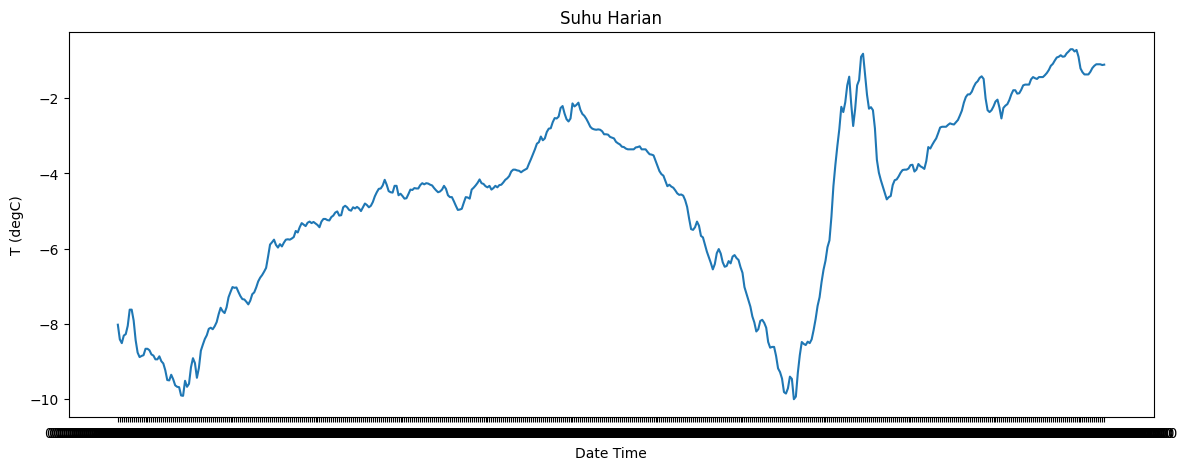

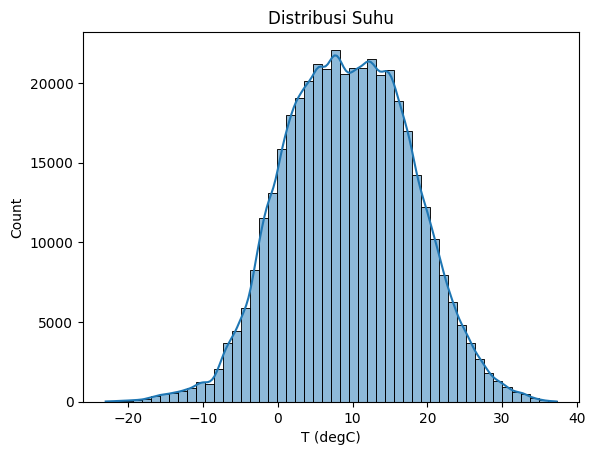

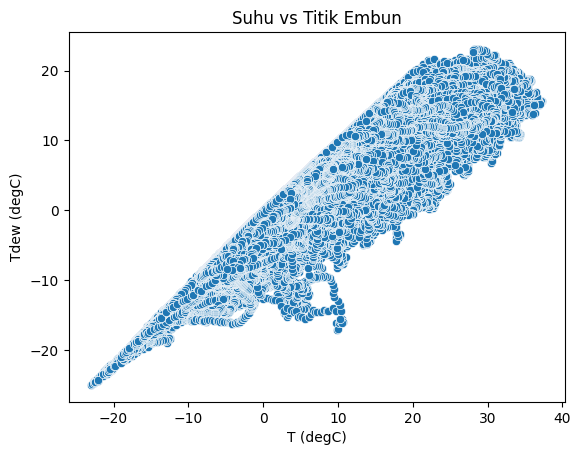

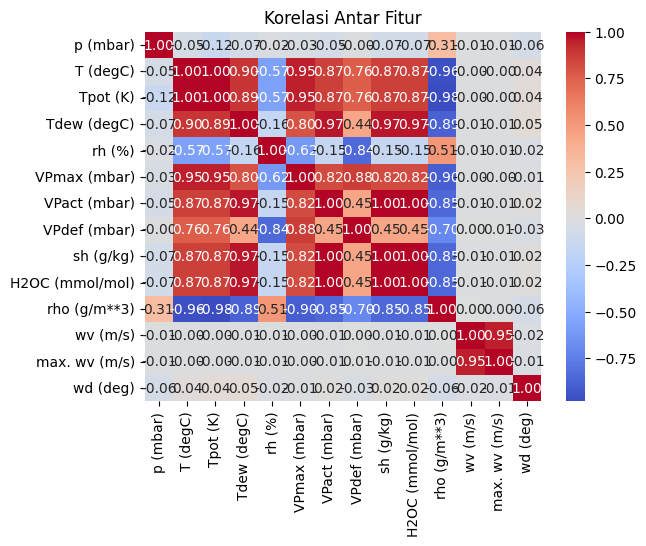

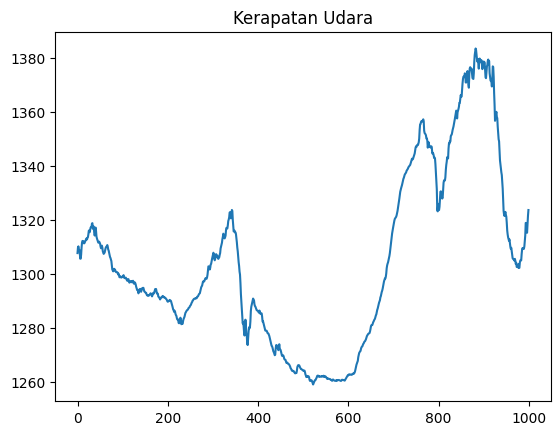

In [ ]:
plt.figure(figsize=(14, 5))
sns.lineplot(x='Date Time', y='T (degC)', data=df[:500])
plt.title('Suhu Harian')
plt.show()

sns.histplot(df['T (degC)'], bins=50, kde=True)
plt.title('Distribusi Suhu')
plt.show()

sns.scatterplot(x='T (degC)', y='Tdew (degC)', data=df)
plt.title('Suhu vs Titik Embun')
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

plt.plot(df['rho (g/m**3)'][:1000])
plt.title('Kerapatan Udara')
plt.show()


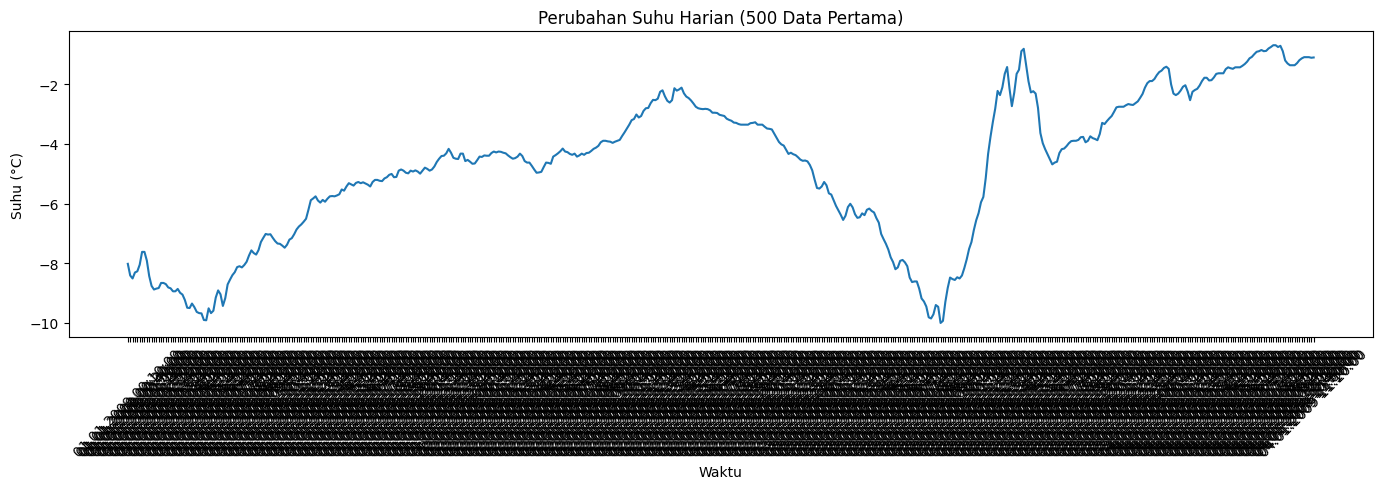

In [ ]:


plt.figure(figsize=(14, 5))
sns.lineplot(x='Date Time', y='T (degC)', data=df[:500])
plt.title('Perubahan Suhu Harian (500 Data Pertama)')
plt.xlabel('Waktu')
plt.ylabel('Suhu (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


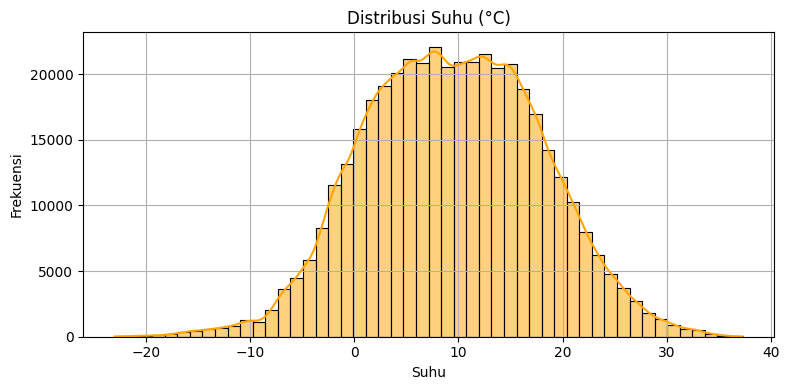

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['T (degC)'], bins=50, kde=True, color='orange')
plt.title('Distribusi Suhu (°C)')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.tight_layout()
plt.show()


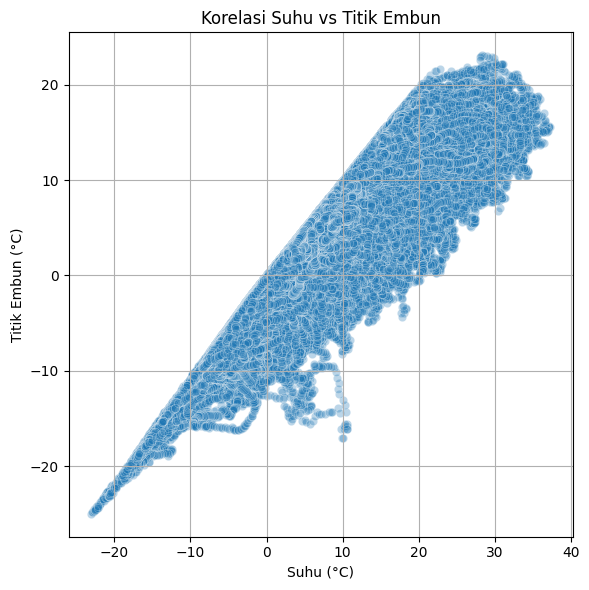

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='T (degC)', y='Tdew (degC)', data=df, alpha=0.3)
plt.title('Korelasi Suhu vs Titik Embun')
plt.xlabel('Suhu (°C)')
plt.ylabel('Titik Embun (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


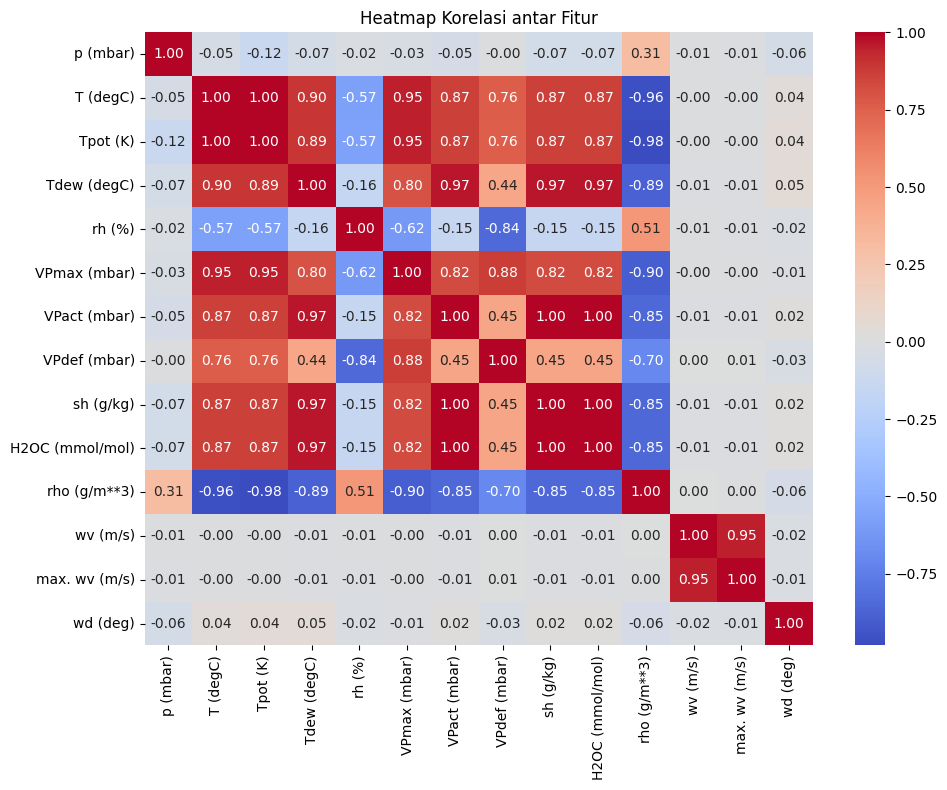

In [ ]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi antar Fitur')
plt.tight_layout()
plt.show()


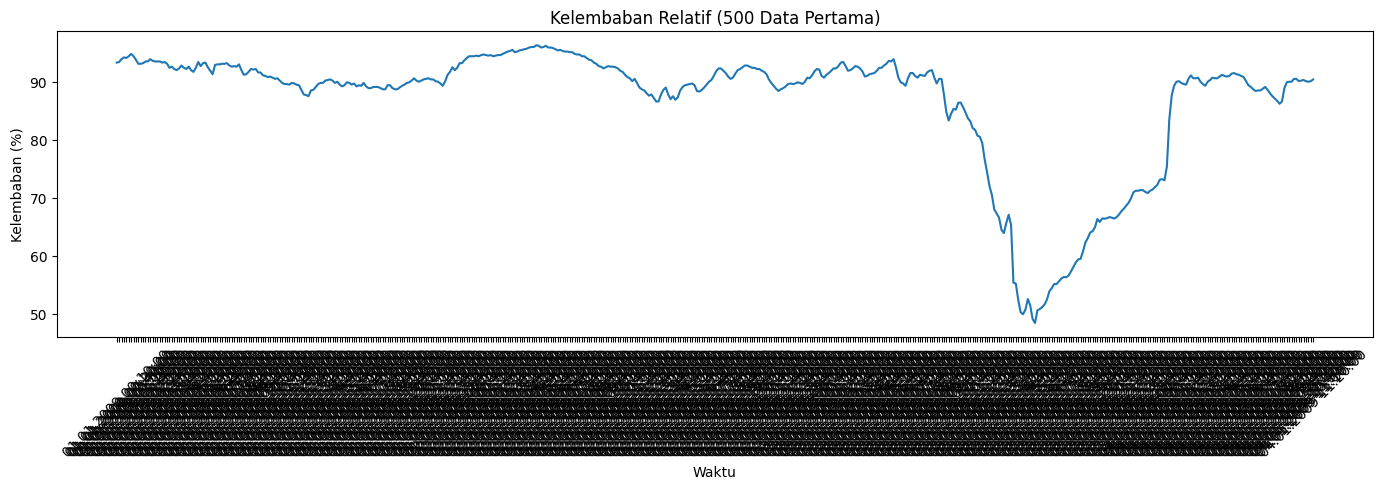

In [ ]:
plt.figure(figsize=(14, 5))
sns.lineplot(x='Date Time', y='rh (%)', data=df[:500])
plt.title('Kelembaban Relatif (500 Data Pertama)')
plt.xlabel('Waktu')
plt.ylabel('Kelembaban (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Data Preparation

In [ ]:

data = df[['T (degC)']]


data = data.dropna()


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


# Modeling

In [ ]:

def create_dataset(dataset, time_step=10):
    X, y = [], []
    for i in range(len(dataset)-time_step):
        X.append(dataset[i:i+time_step, 0])
        y.append(dataset[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_scaled, time_step)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


early_stop = EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, callbacks=[early_stop])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
9463/9463 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - loss: 0.0017 - mae: 0.0114 - val_loss: 2.6126e-05 - val_mae: 0.0033
Epoch 2/10
9463/9463 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 2.4500e-05 - mae: 0.0034 - val_loss: 1.2439e-05 - val_mae: 0.0023
Epoch 3/10
9463/9463 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - loss: 1.4969e-05 - mae: 0.0027 - val_loss: 1.2058e-05 - val_mae: 0.0022
Epoch 4/10
9463/9463 ━━━━━━━━━━━━━━━━━━━━ 85s 7ms/step - loss: 1.4272e-05 - mae: 0.0026 - val_loss: 1.5197e-05 - val_mae: 0.0029
Epoch 5/10
9463/9463 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - loss: 1.4185e-05 - mae: 0.0026 - val_loss: 1.2164e-05 - val_mae: 0.0023
Epoch 6/10
9463/9463 ━━━━━━━━━━━━━━━━━━━━ 84s 7ms/step - loss: 1.3428e-05 - mae: 0.0025 - val_loss: 1.2019e-05 - val_mae: 0.0022
Epoch 7/10
9463/9463 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - loss: 1.3520e-05 - mae: 0.0025 - val_loss: 1.5881e-05 - val_mae: 0.0029
Epoch 8/10
9463/9463 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 1.3445e-05 - mae: 0.0025 - val_loss: 1

# Evaluation

2629/2629 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1.1950e-05 - mae: 0.0023
Loss: 0.0000 | MAE: 0.0022
2629/2629 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
RMSE: 0.0034, R²: 0.9994


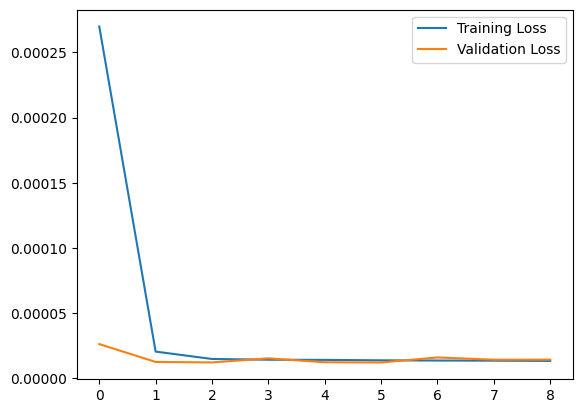

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f} | MAE: {mae:.4f}")

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


# Deployment

## Model Simulation

In [ ]:
import joblib


model.save('lstm_temperature_model.keras')
joblib.dump(scaler, 'scaler_y.pkl')

sample = X_test[-1:]
pred_scaled = model.predict(sample)
predicted_temp = scaler.inverse_transform(pred_scaled)
print(f"Prediksi Suhu (°C): {predicted_temp[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediksi Suhu (°C): 4.21


## Save Model

In [ ]:

model.save('lstm_temperature_model.keras')


import pickle
with open('scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler, f)


NameError: name 'model' is not defined